Name: Tneoh Chuan Lin

Matrix_no: 22004808

In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A, columns=['f1','f2','f3','f4'])

df

,f1,f2,f3,f4
0,1,2,3,4
1,5,5,6,7
2,1,4,2,3
3,5,3,2,1
4,8,1,2,2


# Step 1: Compute Eigenvalues and Eigenvectors

The dimension of matrix dataset is **5 x 4** (**non-square matrix**).

| | f1 | f2 | f3 | f4 |
|-|-|-|-|-|
| 0 | 1 | 2 | 3 | 4 |
| 1 | 5 | 5 | 6 | 7 |
| 2 | 1 | 4 | 2 | 3 |
| 3 | 5 | 3 | 2 | 1 |
| 4 | 8 | 1 | 2 | 2 |

The eigenvalues and eigenvectors cannot be directly computed. Since PCA does not require eigenvalues and eigenvectors, we are going to square the matrix by using its **covariance matrix**, **preserving the variance and covariance of the features in the original dataset**.

## Step 1.1: Standardize Original Matrix

In [2]:
mean = df.mean()
std = df.std()

standardized_df = (df - mean) / std

print("Mean:\n", mean)
print()
print("Standard Deviation:\n", std)
print()
print("Standardized Dataset:")
standardized_df

Mean:
 f1    4.0
f2    3.0
f3    3.0
f4    3.4
dtype: float64

Standard Deviation:
 f1    3.000000
f2    1.581139
f3    1.732051
f4    2.302173
dtype: float64

Standardized Dataset:


,f1,f2,f3,f4
0,-1.000000,-0.632456,0.000000,0.260623
1,0.333333,1.264911,1.732051,1.563740
2,-1.000000,0.632456,-0.577350,-0.173749
3,0.333333,0.000000,-0.577350,-1.042493
4,1.333333,-1.264911,-0.577350,-0.608121


## Step 1.2: Compute Covariance Matrix

`standardized_df`:

| | f1 | f2 | f3 | f4 |
|-|-|-|-|-|
| 0 | a | b | c | d |
| 1 | e | f | g | h |
| 2 | i | j | k | l |
| 3 | m | n | o | p |
| 4 | q | r | s | t |

`standardized_df.T`:

| | 0 | 1 | 2 | 3 | 4 |
|-|-|-|-|-|-|
| f1 | a | e | i | m | q |
| f2 | b | f | j | n | r |
| f3 | c | g | k | o | s |
| f4 | d | h | l | p | t |

Multiplication of `standardized_df.T` and `standardized_df`:

| | | | |
|-|-|-|-|
|`a*a + e*e + i*i + m*m + q*q`|`ab + ef + ij + mn + qr`|`ac + eg + ik + mo + qs`|`ad + eh + il + mp + qt`|
|`ab + ef + ij + mn + qr`|`a*a + e*e + i*i + m*m + q*q`|`bc + fg + jk + no + rs`|`bd + fh + jl + np + rt`|
|`ac + eg + ik + mo + qs`|`bc + fg + jk + no + rs`|`a*a + e*e + i*i + m*m + q*q`|`cd + gh + kl + op + st`|
|`ad + eh + il + mp + qt`|`bd + fh + jl + np + rt`|`cd + gh + kl + op + st`|`a*a + e*e + i*i + m*m + q*q`|

In [3]:
cov_matrix = (standardized_df.T @ standardized_df) / standardized_df.shape[0]

print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
           f1        f2        f3        f4
f1  0.800000 -0.252982  0.038490 -0.144791
f2 -0.252982  0.800000  0.511208  0.494498
f3  0.038490  0.511208  0.800000  0.752355
f4 -0.144791  0.494498  0.752355  0.800000


## Step 1.3: Compute Eigenvalues and Eigenvectors of Covariance Matrix

In [4]:
eigenvalues, eigenvectors = LA.eigh(cov_matrix)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [0.02002497 0.31510964 0.8522308  2.01263459]
Eigenvectors:
 [[-0.19616173 -0.30707099  0.91705888 -0.16195986]
 [-0.12061043 -0.81731886 -0.20692161  0.52404813]
 [ 0.72009851  0.1882497   0.3205394   0.58589647]
 [-0.65454704  0.44973251  0.11593512  0.59654663]]


Each eigenvalue corresponds to the eigenvector at the same position (**same column**).

# Step 2: Sort Eigenvalues and Corresponding Eigenvectors

In [5]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues:", eigenvalues)
print("Sorted Eigenvectors:\n", eigenvectors)

Sorted Eigenvalues: [2.01263459 0.8522308  0.31510964 0.02002497]
Sorted Eigenvectors:
 [[-0.16195986  0.91705888 -0.30707099 -0.19616173]
 [ 0.52404813 -0.20692161 -0.81731886 -0.12061043]
 [ 0.58589647  0.3205394   0.1882497   0.72009851]
 [ 0.59654663  0.11593512  0.44973251 -0.65454704]]


Sorting the eigenvalues and their corresponding eigenvectors in **descending order** allows prioritization of directions that capture the **most variance** in the data.

# Step 3: Compute Error Between Original Matrix and `Back_computed_matrix_transform` (top1 PC Component)

## Step 3.1: Transform Original Matrix to Principal Component Space (top1 PC Component)

In [6]:
Matrix_transform = standardized_df @ eigenvectors[:, :1]

print("top1 Eigenvector:\n", eigenvectors[:, :1])
print("Matrix_transform:\n", Matrix_transform)

top1 Eigenvector:
 [[-0.16195986]
 [ 0.52404813]
 [ 0.58589647]
 [ 0.59654663]]
Matrix_transform:
           0
0 -0.014003
1  2.556534
2  0.051480
3 -1.014150
4 -1.579861


## Step 3.2: Transform Back `Matrix_transform` to Original Space (`Back_computed_matrix_transform`)

In [7]:
Back_computed_matrix_transform = (Matrix_transform @ eigenvectors[:, :1].T) * std.values + mean.values

print("Back_computed_matrix_transform:\n", Back_computed_matrix_transform)

Back_computed_matrix_transform:
           0         1         2         3
0  4.006804  2.988397  2.985789  3.380769
1  2.757832  5.118326  5.594377  6.911025
2  3.974987  3.042656  3.052242  3.470701
3  4.492755  2.159683  1.970838  2.007214
4  4.767622  1.690939  1.396753  1.230293


## Step 3.3: Compute Error

In [8]:
errors = []
error = LA.norm(A - Back_computed_matrix_transform, ord='fro')
errors.append(error)

print("Error:", error)

Error: 6.3696010484138545


# Step 4: Repeat Step 3 using top2, top3 and top4 PC Components

In [9]:
for k in range(1, eigenvalues.shape[0]):
  Matrix_transform = standardized_df @ eigenvectors[:, :k+1]
  Back_computed_matrix_transform = (Matrix_transform @ eigenvectors[:, :k+1].T) * std.values + mean.values
  error = LA.norm(A - Back_computed_matrix_transform, ord='fro')
  errors.append(error)
  print(f"top{k+1} Eigenvector:\n", eigenvectors[:, :k+1])
  print("Matrix_transform:\n", Matrix_transform)
  print("Back_computed_matrix_transform:\n", Back_computed_matrix_transform)
  print("Error:\n", error)
  print()

print("Errors:\n", errors)

top2 Eigenvector:
 [[-0.16195986  0.91705888]
 [ 0.52404813 -0.20692161]
 [ 0.58589647  0.3205394 ]
 [ 0.59654663  0.11593512]]
Matrix_transform:
           0         1
0 -0.014003 -0.755975
1  2.556534  0.780432
2  0.051480 -1.253135
3 -1.014150 -0.000239
4 -1.579861  1.228917
Back_computed_matrix_transform:
           0         1         2         3
0  1.926984  3.235731  2.566079  3.178997
1  4.904938  4.862991  6.027665  7.119324
2  0.527392  3.452646  2.356514  3.136235
3  4.492098  2.159761  1.970705  2.007150
4  8.148588  1.288872  2.079036  1.558294
Error:
 2.499228507404052

top3 Eigenvector:
 [[-0.16195986  0.91705888 -0.30707099]
 [ 0.52404813 -0.20692161 -0.81731886]
 [ 0.58589647  0.3205394   0.1882497 ]
 [ 0.59654663  0.11593512  0.44973251]]
Matrix_transform:
           0         1         2
0 -0.014003 -0.755975  0.941200
1  2.556534  0.780432 -0.106870
2  0.051480 -1.253135 -0.396673
3 -1.014150 -0.000239 -0.679886
4 -1.579861  1.228917  0.242230
Back_computed_matrix_t

# Step 5: Plot Error vs. K-Principal Component

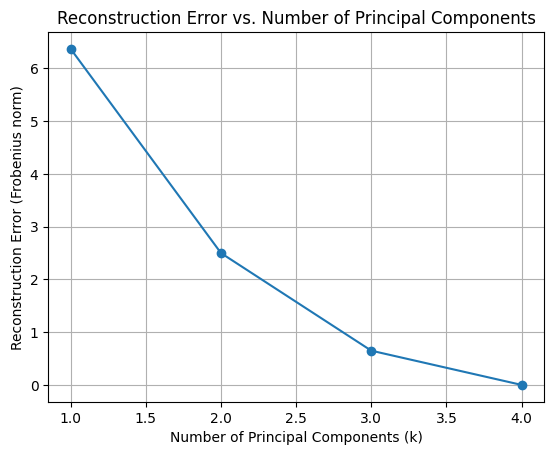

In [10]:
plt.figure()
plt.plot(range(1, A.shape[1] + 1), errors, marker='o')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Reconstruction Error (Frobenius norm)')
plt.title('Reconstruction Error vs. Number of Principal Components')
plt.grid(True)
plt.show()

Adding **more** principal components allows for a **more accurate** representation of the original data.

When you reconstruct the data using PCA, you're essentially approximating the original data matrix by multiplying the principal component matrix by its transpose and then denormalize it. Mathematically, this process can be written as:
```
Matrix_transform = standardized_df @ eigenvectors[:, :k+1]
Back_computed_matrix_transform = (Matrix_transform @ eigenvectors[:, :k+1].T) * std.values + mean.values
```

As 𝑘 increases, you're including more principal components in the reconstruction process. Each additional principal component captures additional variation in the data that was not captured by the previous components. Therefore, the reconstructed data becomes closer to the original data, resulting in a lower reconstruction error.

In other words, by increasing 𝑘, you're using more information from the original data to reconstruct it. This typically leads to a reduction in reconstruction error because you're better approximating the original data's structure and variability. However, it's important to note that adding too many principal components can lead to overfitting and may not necessarily improve the performance of your model. The optimal choice of 𝑘 depends on the specific application and the desired balance between accuracy and simplicity.